In [1]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from joblib import dump
import numpy as np
import random


In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
X, y = mnist.data, mnist.target.astype(np.uint8)

In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [4]:
rf = RandomForestClassifier(random_state=42)

In [5]:
# Hyperparameter search space
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [6]:
# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    verbose=2,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)





Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  19.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  19.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  19.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  21.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  20.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  21.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estim

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy', verbose=2)

In [7]:
print("Best Hyperparameters:\n", random_search.best_params_)

Best Hyperparameters:
 {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


In [8]:
# Cross-validate the best estimator on the training set
cv_scores = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')

# Print results
print("\nCross-validation scores (5-fold):", cv_scores)
print("Mean CV accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation: {:.4f}".format(cv_scores.std()))




Cross-validation scores (5-fold): [0.97075    0.96791667 0.96641667 0.96608333 0.97258333]
Mean CV accuracy: 0.9688
Standard deviation: 0.0025


In [9]:
# Evaluate
y_pred = random_search.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



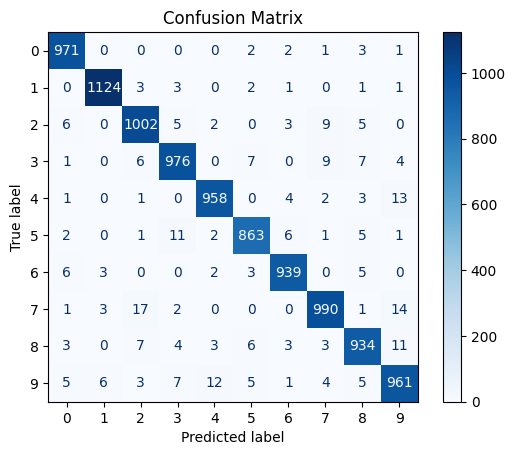

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_search.best_estimator_.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [11]:
# Save best model
dump(random_search.best_estimator_, "best_rf_mnist_model.joblib")


['best_rf_mnist_model.joblib']

In [12]:
random_index = random.randint(0, len(X_test) - 1)
sample_digit = X_test[random_index].reshape(28, 28)

In [13]:
predicted_label = random_search.predict([X_test[random_index]])[0]
true_label = y_test[random_index]

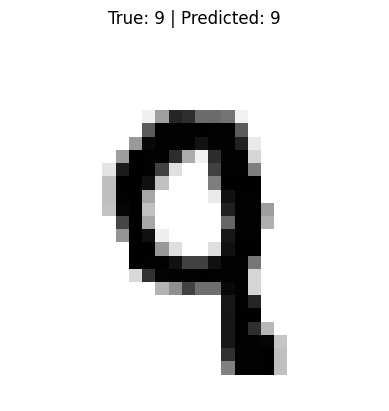

In [15]:
plt.imshow(sample_digit, cmap="binary")
plt.title(f"True: {true_label} | Predicted: {predicted_label}")
plt.axis("off")
plt.show()